# Test out dominant column in relation to eigenvalues

Computational tests to determine the influence of the column with the largest L2 norm on the eigenvalues of the gram matrix. The test is performed by generating a random matrix and then scaling one of its columns to be dominant. The eigenvalues of the gram matrix are then computed and compared.

In [1]:
import gc
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns

First, we create a random matrix, A and random column vector, b. We then scale b by various factors and compute the eigenvectors of the gram matrix, G = A^T A + b b^T. We then compute the angle between the first eigenvector and the scaled column vector b. This angle is expected to be small if the column vector b is dominant in the gram matrix. 

We also compute the eigenvalues of the gram matrix and check if they are close to the square of the L2 norm of the scaled column vector b.

In [2]:
# create random matrix
m = 100  # number of columns
n = 200  # number of rows
A = np.random.rand(n, m)
A_copy = A.copy()

# create random vector
b = np.random.rand(n)

In [3]:
# angle between b and first eignevector of A
angles = []
multiple_of_b = [1, 2, 5, 10, 20, 50, 100, 200, 300, 400, 500, 700, 900, 1000]
column_to_add_to = 3
b_magnitude = []
lambda_max = []

for i in range(len(multiple_of_b)):
    added_column = b * multiple_of_b[i]
    A[:, column_to_add_to] = A_copy[:, column_to_add_to] + added_column
    
    u, v = np.linalg.eig(A @ A.T)

    angle = np.arccos(np.dot(b, v[:, 0]) / (np.linalg.norm(b) * np.linalg.norm(v[:, 0])))
    # in degrees

    angles.append(angle)
    b_magnitude.append(np.linalg.norm(added_column))
    lambda_max.append(u[0])

d:\CSM\Mines_Research\Repositories\Coherence_Analyses\.venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\CSM\Mines_Research\Repositories\Coherence_Analyses\.venv\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Largest eigenvalue of A vs. magnitude of b')

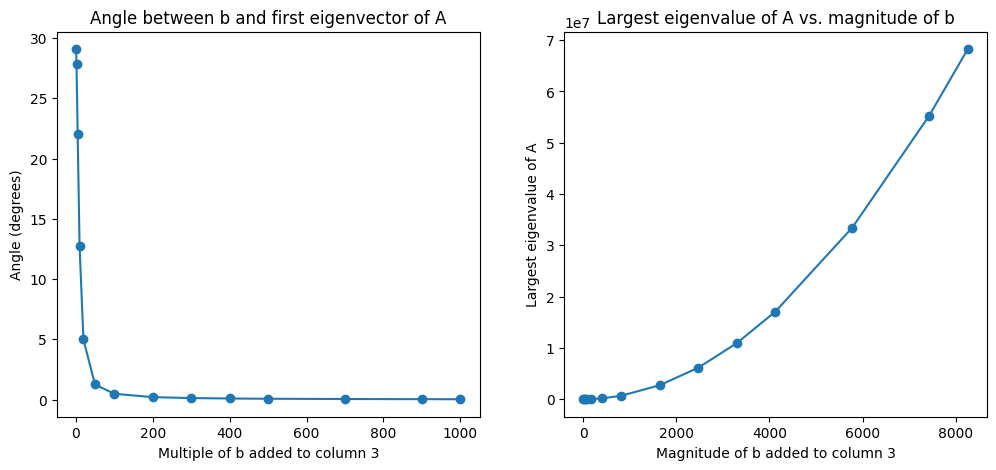

In [4]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(multiple_of_b, [abs(a - np.pi) * (180/np.pi) if a > np.pi/2 else a * (180/np.pi) for a in angles], marker='o')
plt.xlabel('Multiple of b added to column 3')
plt.ylabel('Angle (degrees)')
plt.title('Angle between b and first eigenvector of A')
plt.subplot(1, 2, 2)
plt.plot(b_magnitude, lambda_max, marker='o')
plt.xlabel('Magnitude of b added to column 3')
plt.ylabel('Largest eigenvalue of A')
plt.title('Largest eigenvalue of A vs. magnitude of b')
# plt.xscale('log')

## Testing for the case where b is added to all columns of A

We are doing the same thing as above, but now we are adding the column vector b to all columns of A.

In [5]:
angles_all = []
b_magnitude_all = []
lambda_max_all = []


for i in range(len(multiple_of_b)):
    added_column = b * multiple_of_b[i]
    b_magnitude_all.append(np.linalg.norm(added_column))
    # tile the added column to match the shape of A
    added_column = np.tile(added_column, (m, 1)).T
    A = A_copy + added_column
    
    u, v = np.linalg.eig(A @ A.T)

    # angle = np.arccos(np.dot(A[:,0], v[:, 0]) / (np.linalg.norm(A[:,0]) * np.linalg.norm(v[:, 0])))
    angle = np.arccos(np.dot(b, v[:, 0]) / (np.linalg.norm(b) * np.linalg.norm(v[:, 0])))
    # in degrees

    angles_all.append(angle)
    lambda_max_all.append(u[0])

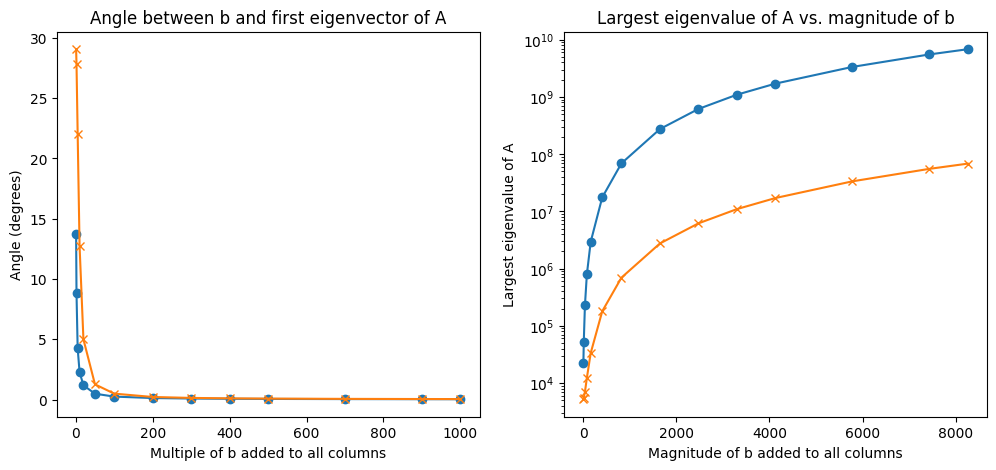

In [6]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(multiple_of_b, [abs(a - np.pi) * (180/np.pi) if a > np.pi/2 else a * (180/np.pi) for a in angles_all], marker='o')
plt.plot(multiple_of_b, [abs(a - np.pi) * (180/np.pi) if a > np.pi/2 else a * (180/np.pi) for a in angles], marker='x')
plt.xlabel('Multiple of b added to all columns')
plt.ylabel('Angle (degrees)')
plt.title('Angle between b and first eigenvector of A')
# plt.xscale('log')
plt.subplot(1, 2, 2)
plt.plot(b_magnitude_all, lambda_max_all, marker='o', label='added to all columns')
plt.plot(b_magnitude, lambda_max, marker='x', label='added to one column')
plt.xlabel('Magnitude of b added to all columns')
plt.ylabel('Largest eigenvalue of A')
plt.title('Largest eigenvalue of A vs. magnitude of b')
plt.yscale('log')

Now we can take a look at the relationship between the angles computed in the case where b is added to all columns of A and the case where b is added to only one column of A. From above the angle for the former case gets small faster but we want to see if there is a consistent relationship between the two angles. We can do this by plotting the angles for both cases against each other.

Text(0, 0.5, 'Angle between b and first eigenvector of A (added to all columns)')

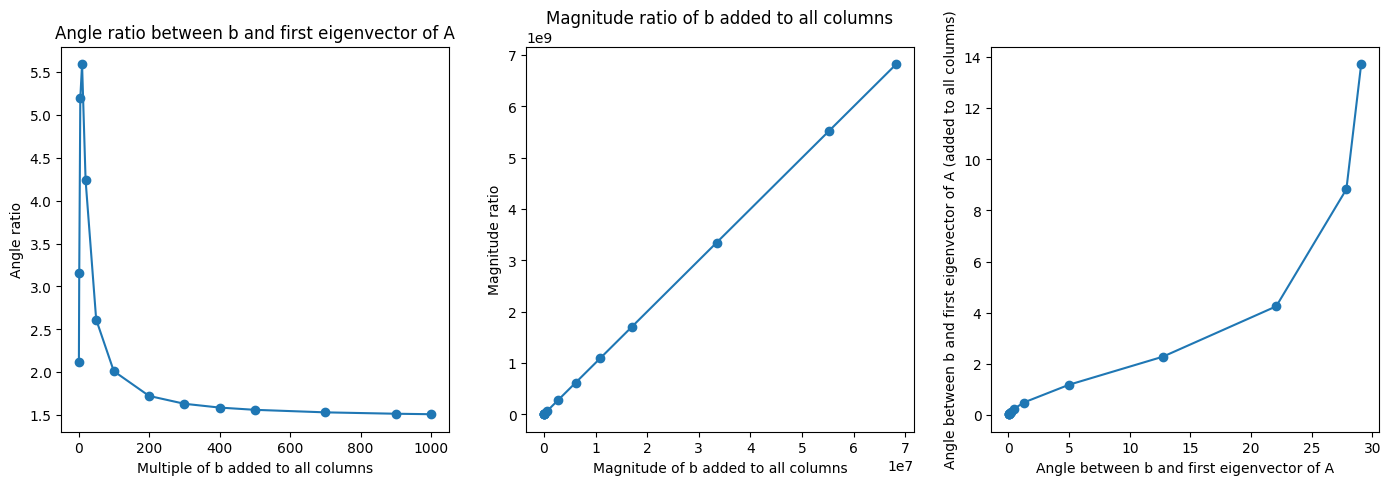

In [7]:
magnitude_ratio = [a / b for a, b in zip(lambda_max, lambda_max_all)]
plot_angles = [abs(a - np.pi) * (180/np.pi) if a > np.pi/2 else a * (180/np.pi) for a in angles]
plot_angles_all = [abs(a - np.pi) * (180/np.pi) if a > np.pi/2 else a * (180/np.pi) for a in angles_all]
angle_ratio = [a / b for a, b in zip(plot_angles, plot_angles_all)]

plt.figure(figsize=(17, 5))
plt.subplot(1, 3, 1)
plt.plot(multiple_of_b, angle_ratio, marker='o')
plt.xlabel('Multiple of b added to all columns')
plt.ylabel('Angle ratio')
plt.title('Angle ratio between b and first eigenvector of A')
plt.subplot(1, 3, 2)
# plt.plot(b_magnitude_all, magnitude_ratio, marker='o')
plt.plot(lambda_max, lambda_max_all, marker='o')
plt.xlabel('Magnitude of b added to all columns')
plt.ylabel('Magnitude ratio')
plt.title('Magnitude ratio of b added to all columns')
# plt.xscale('log')
plt.subplot(1, 3, 3)
plt.plot(plot_angles, plot_angles_all, marker='o')
plt.xlabel('Angle between b and first eigenvector of A')
plt.ylabel('Angle between b and first eigenvector of A (added to all columns)')


Now, we are going to test the magnitude of the column after b is added. We start with the assumption that without the added column, all the columns of A are of the same magnitude and can be represented in terms of the number of columns, n i.e. $\|a_i\|_2^2 = \frac{\|A\|_F^2}{n}$. That would make the ratio of this to the 

In [8]:
n = [1, 2, 3, 4, 5, 6, 8, 10, 15, 20, 30, 40, 50, 100]
s = [0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10, 15, 20, 25]
f = np.zeros((len(n), len(s)))
f2 = np.zeros((len(n), len(s)))
for i in range(len(n)):
    for j in range(len(s)):
        # f2[i, j] = 1 / (n[i] * (1 + s[j]))
        f2[i, j] = 1 / (n[i] + s[j])
for i in range(len(n)):
    for j in range(len(s)):
        f[i, j] = (1 + s[j]) / (n[i] + s[j])

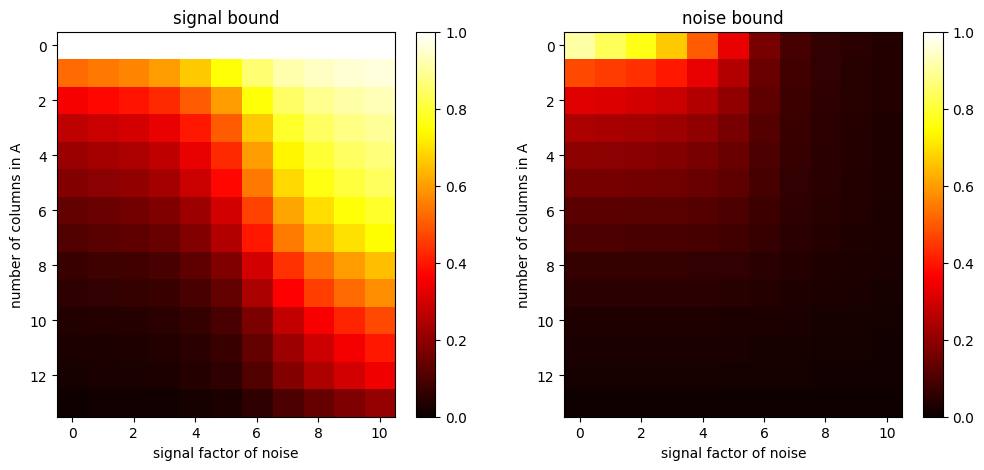

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(f, cmap='hot', vmax=1, vmin=0, aspect='auto')
plt.title('signal bound')
plt.xlabel('signal factor of noise')
plt.ylabel('number of columns in A')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(f2, cmap='hot', vmax=1, vmin=0, aspect='auto')
plt.title('noise bound')
plt.xlabel('signal factor of noise')
plt.ylabel('number of columns in A')
plt.colorbar()

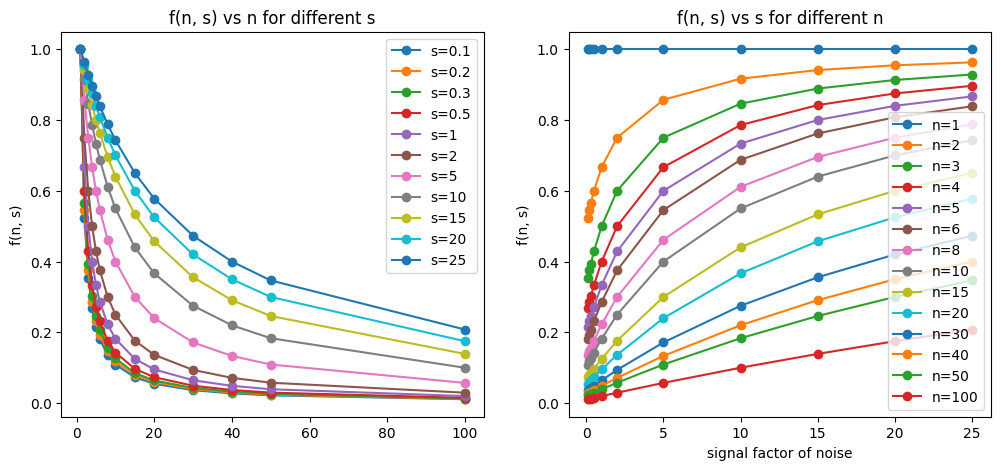

In [10]:
# plt.plot(n, f[:, 0], marker='o', label='s=1')
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for i in range(len(s)):
    plt.plot(n, f[:, i], marker='o', label=f's={s[i]}')
plt.ylabel('number of columns in A')
plt.ylabel('f(n, s)')
plt.title('f(n, s) vs n for different s')
plt.legend()
plt.subplot(1, 2, 2)
for i in range(len(n)):
    plt.plot(s, f[i], marker='o', label=f'n={n[i]}')
plt.xlabel('signal factor of noise')
plt.ylabel('f(n, s)')
plt.title('f(n, s) vs s for different n')
plt.legend()

Text(0.5, 1.0, 'f(betta) vs betta')

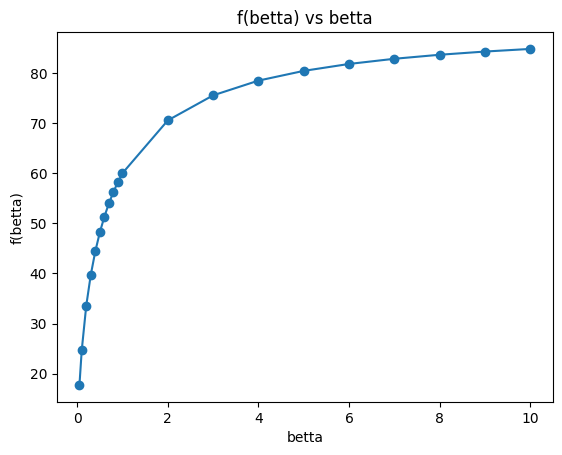

In [11]:
betta = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
f_betta = np.zeros(len(betta))
for i in range(len(betta)):
    f_betta[i] = math.degrees(np.arccos(1 / (1 + betta[i])))
plt.figure()
plt.plot(betta, f_betta, marker='o')
plt.xlabel('betta')
plt.ylabel('f(betta)')
plt.title('f(betta) vs betta')

## Makes tests for real data



In [2]:
import os
import sys

sys.path.append("../")
sys.path.append(os.path.join(os.path.dirname(""), os.pardir))
import coherence_analysis.utils as f

In [26]:
basepath = Path("D:\CSM\Mines_Research\Test_data\BH_events")

event_file_groups = [["PoroTomo_iDAS16043_160313210318.h5", "PoroTomo_iDAS16043_160313210348.h5"],
                     ["PoroTomo_iDAS16043_160313220548.h5", "PoroTomo_iDAS16043_160313220618.h5"],
                     ["PoroTomo_iDAS16043_160313220848.h5", "PoroTomo_iDAS16043_160313220918.h5"],
                     ["PoroTomo_iDAS16043_160313221218.h5", "PoroTomo_iDAS16043_160313221248.h5"],
                     ["PoroTomo_iDAS16043_160314010048.h5", "PoroTomo_iDAS16043_160314010118.h5"],
                     ["PoroTomo_iDAS16043_160314035718.h5", "PoroTomo_iDAS16043_160314035748.h5"],
                     ["PoroTomo_iDAS16043_160314040248.h5", "PoroTomo_iDAS16043_160314040318.h5"],
                     ["PoroTomo_iDAS16043_160314045118.h5", "PoroTomo_iDAS16043_160314045148.h5"],
                     ["PoroTomo_iDAS16043_160314064718.h5", "PoroTomo_iDAS16043_160314064748.h5"],
                     ["PoroTomo_iDAS16043_160314070818.h5", "PoroTomo_iDAS16043_160314070848.h5"],
                     ["PoroTomo_iDAS16043_160314083548.h5", "PoroTomo_iDAS16043_160314083618.h5"],
                     ["PoroTomo_iDAS16043_160314083918.h5", "PoroTomo_iDAS16043_160314083948.h5"],
                     ["PoroTomo_iDAS16043_160314083818.h5", "PoroTomo_iDAS16043_160314083848.h5", "PoroTomo_iDAS16043_160314083918.h5"],
                     ]

def get_coherence_data(event_file_groups, basepath, group_index = -1, start_channel=0, end_channel=1000, num_sensors=1, end_sample=-1):

    file = basepath / event_file_groups[group_index][0]
    data, _ = f.load_brady_hdf5(file, normalize="no")
    print(f"Loading {file}")
    for a in range(1, len(event_file_groups[group_index]) - 1):
        file = basepath / event_file_groups[group_index][a]
        print(f"Loading {file}")
        data2, _ = f.load_brady_hdf5(file, normalize="no")
        data = np.append(data, data2, axis=1)

    file = basepath / event_file_groups[group_index][-1]
    print(f"Loading {file}")
    data2, _ = f.load_brady_hdf5(file, normalize="no")

    if end_sample == -1:
        data = np.append(data, data2, axis=1)
    else:
        data = np.append(data, data2[:, :end_sample], axis=1)
    coherence_data = data[start_channel : end_channel : int((end_channel - start_channel) / num_sensors)]
    
    return coherence_data

def norm_dot_max_column(norm_win_spectra):

    norms = np.linalg.norm(norm_win_spectra, axis=0)
    max_ind = np.argmax(norms)

    divide_by = norms[max_ind] * norms
    unit_dot_products = (norm_win_spectra.T @ np.conjugate(norm_win_spectra[:, max_ind])) / divide_by
    # unit_dot_products = unit_dot_products.real
    # sum(norms ** 2) - norms[max_ind] ** 2

    return unit_dot_products * norms**2, max_ind

def get_norm_parameters(eig_ratios_coherence, norm_win_spectra, threshold_u, threshold_d, qr=True, dot_product=True):
    """Compute column with max norm and combined norm of the rest of the columns.
    """

    max_norms_events = []
    other_norms_events = []
    max_norms_noise = []
    other_norms_noise = []

    for a in range(len(eig_ratios_coherence)):
        if qr:
            _, R = np.linalg.qr(norm_win_spectra[a])

            # max_norm = max(np.linalg.norm(R, axis=1)**2)
            # other_norm = np.sum(np.linalg.norm(R, axis=1)**2) - max_norm

            norms = np.linalg.norm(R, axis=1)
            max_ind = np.argmax(norms)
            norms = R @ np.conjugate(R[max_ind])
            max_norm = norms[max_ind]
            other_norm = np.sum(norms) - max_norm
        elif dot_product:
            norms, max_ind = norm_dot_max_column(norm_win_spectra[a])
            max_norm = norms[max_ind]
            other_norm = np.sum(norms) - max_norm
        else:
            max_norm = max(np.linalg.norm(norm_win_spectra[a], axis=0)**2)
            other_norm = np.sum(np.linalg.norm(norm_win_spectra[a], axis=0)**2) - max_norm

        if eig_ratios_coherence[a] > threshold_u:
            max_norms_events.append(max_norm)
            other_norms_events.append(other_norm)
        elif eig_ratios_coherence[a] < threshold_d:
            max_norms_noise.append(max_norm)
            other_norms_noise.append(other_norm)
    
    return max_norms_events, other_norms_events, max_norms_noise, other_norms_noise

def plot_boxplot(data, x=None, y=None,
                 title="Boxplot",
                 xlabel=None, ylabel=None,
                 xtick_labels=None, xtick_rotation=0,
                 box_width=0.8,
                 figsize=(8, 5),
                 palette="Set2"):
    """
    Plots a customizable boxplot using seaborn and matplotlib.

    Parameters:
    ----------
    data : array-like or pandas.DataFrame
        Data to plot. Can be a list of arrays or a DataFrame for grouped plots.
    x : str, optional
        Column name for x-axis grouping (used with DataFrame input).
    y : str, optional
        Column name for y-axis values (used with DataFrame input).
    title : str, optional
        Title of the plot.
    xlabel : str, optional
        Label for the x-axis. If None, uses default from seaborn.
    ylabel : str, optional
        Label for the y-axis. If None, uses default from seaborn.
    xtick_labels : list of str, optional
        Custom labels for the x-axis ticks.
    xtick_rotation : int or float, optional
        Rotation angle of x-axis tick labels (default is 0).
    box_width : float, optional
        Width of the boxplots (default is 0.8). Smaller values make thinner boxes.
    figsize : tuple of (float, float), optional
        Size of the figure in inches (default is (10, 6)).
    palette : str or list, optional
        Color palette used by seaborn (default is "Set2").

    Returns:
    -------
    None
        Displays the plot.

    Examples:
    --------
    >>> plot_boxplot(data=[np.random.randn(100), np.random.randn(100)])
    
    >>> df = pd.DataFrame({
    ...     'Category': ['A'] * 100 + ['B'] * 100,
    ...     'Value': np.random.randn(200)
    ... })
    >>> plot_boxplot(df, x='Category', y='Value', box_width=0.5, xtick_rotation=30)
    """
    plt.figure(figsize=figsize)

    if isinstance(data, pd.DataFrame) and x and y:
        ax = sns.boxplot(data=data, x=x, y=y, palette=palette, width=box_width)
    else:
        ax = sns.boxenplot(data=data, palette=palette, width=box_width)

    plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel, fontsize=15, rotation=0, labelpad=20)

    if xtick_labels:
        plt.xticks(ticks=range(len(xtick_labels)), labels=xtick_labels, rotation=xtick_rotation, fontsize=12)
    else:
        plt.xticks(rotation=xtick_rotation)

    plt.yscale('log')
    # plt.ylim((0, 2))
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

In [6]:
start_ch = 3100
nchannels = 2000
nsensors = 400

win_len = 2
overlap = 0
samples_per_sec = 1000

In [7]:
# basepath = Path("D:\CSM\Mines_Research\Test_data\Brady Hotspring")
# coherence_data = get_coherence_data(event_file_groups,
#                                     basepath, group_index = -1,
#                                     start_channel=start_ch,
#                                     end_channel=nchannels + start_ch,
#                                     num_sensors=nsensors,
#                                     end_sample=10000)

basepath = Path("D:\CSM\Mines_Research\Test_data\BH_events")
coherence_data = get_coherence_data(event_file_groups,
                                    basepath, group_index = 2,
                                    start_channel=start_ch,
                                    end_channel=nchannels + start_ch,
                                    num_sensors=nsensors,
                                    end_sample=-1)

Loading D:\CSM\Mines_Research\Test_data\BH_events\PoroTomo_iDAS16043_160313220848.h5
Loading D:\CSM\Mines_Research\Test_data\BH_events\PoroTomo_iDAS16043_160313220918.h5


In [28]:
norm_win_spectra, frequencies = f.normalised_windowed_spectra(
    coherence_data, win_len, overlap, sample_interval=1 / samples_per_sec
)

# welch_coherence_mat = np.matmul(
#     norm_win_spectra, np.conjugate(norm_win_spectra.transpose(0, 2, 1))
# )
# coherence = np.absolute(welch_coherence_mat) ** 2

In [29]:
num_frames = norm_win_spectra.shape[0]
eig_ratios_coherence = np.empty(num_frames)
eig_ratios_coherence_qr = np.empty(num_frames)

for d in range(1,num_frames):
    # U, S, Vh = np.linalg.svd(win_spectra_noise[d])
    S = np.linalg.svd(
            norm_win_spectra[d],
            compute_uv=False,
            hermitian=False,
        )
    svd_approx2 = S**2
    # svd_approx2 = np.sort(S)[::-1]**2
    eig_ratios_coherence[d] = np.max(svd_approx2) / np.sum(svd_approx2)

    Q, R = np.linalg.qr(norm_win_spectra[d])
    # RRH = R @ (np.matrix(R).H)
    # diag is of sqrt(RR^*)
    # qr_approx2 = np.power(np.diag(RRH), 1)
    qr_approx2 = np.sum(np.multiply(R, np.conjugate(R)).real, axis=1)
    eig_ratios_coherence_qr[d] = np.max(qr_approx2) / np.sum(qr_approx2)

In [11]:
R[:,0]

array([1.06937323+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j])

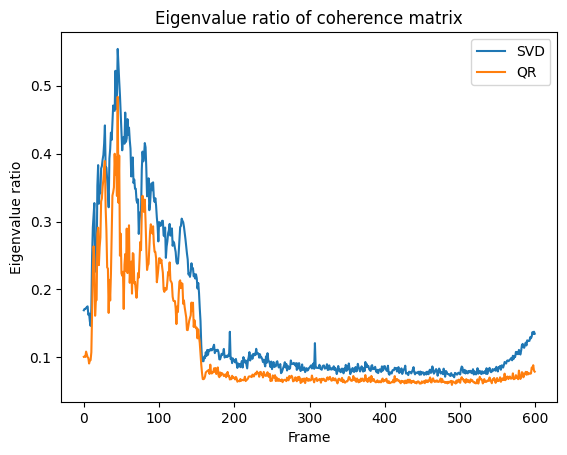

In [13]:
plt.plot(
    eig_ratios_coherence[1:-400],
    label="SVD",
)
plt.plot(
    eig_ratios_coherence_qr[1:-400],
    label="QR",
)
plt.xlabel("Frame")
plt.ylabel("Eigenvalue ratio")
plt.title("Eigenvalue ratio of coherence matrix")
plt.legend()

<Axes: >

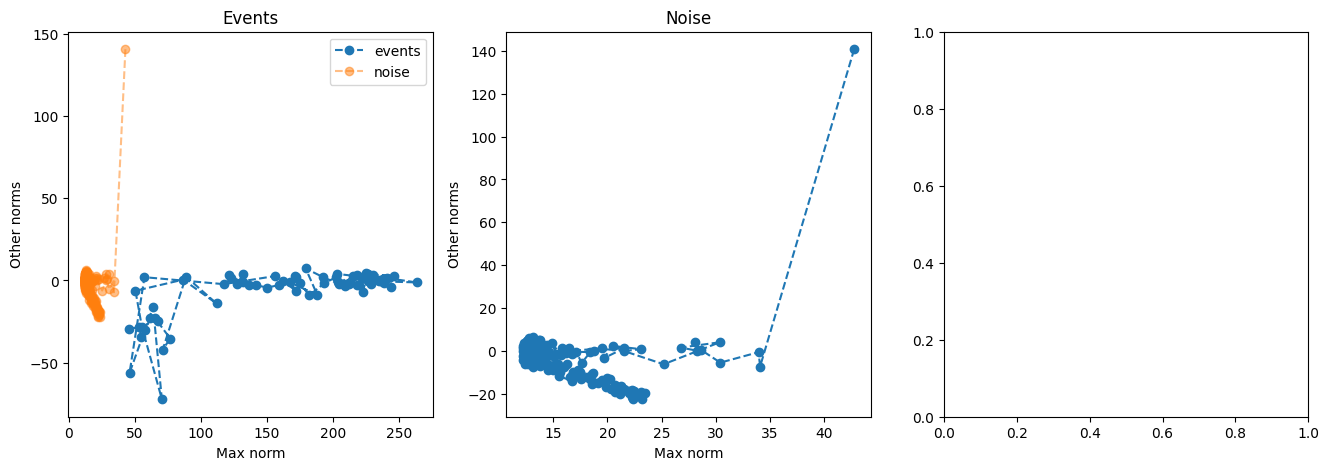

In [30]:
threshold_u = 0.3
threshold_d = 0.1

max_norms_events, other_norms_events, max_norms_noise, other_norms_noise = get_norm_parameters(
    eig_ratios_coherence, norm_win_spectra, threshold_u, threshold_d, qr=False
)
ratios_events = np.array(max_norms_events) / np.array(other_norms_events)
ratios_noise = np.array(max_norms_noise) / np.array(other_norms_noise)

plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.plot(max_norms_events, other_norms_events, "o--", label="events")
plt.plot(max_norms_noise, other_norms_noise, "o--", label="noise", alpha=0.5)
plt.title("Events")
plt.xlabel("Max norm")
plt.ylabel("Other norms")
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(max_norms_noise, other_norms_noise, "o--")
plt.title("Noise")
plt.xlabel("Max norm")
plt.ylabel("Other norms")
plt.subplot(1, 3, 3)

NameError: name 'c' is not defined

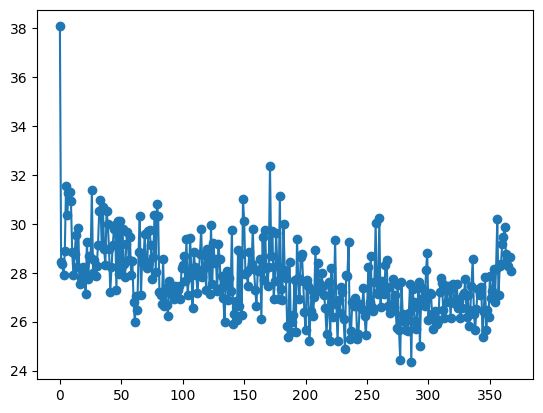

In [15]:
plt.plot(max_norms_noise, "o-")
plt.plot(c, "o-")

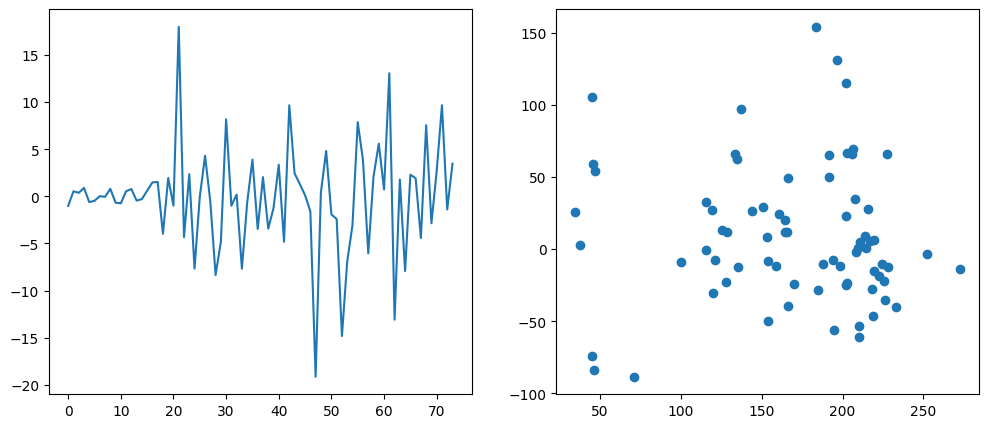

In [ ]:
r_max_norms_events, r_other_norms_events, r_max_norms_noise, r_other_norms_noise = get_norm_parameters(
    eig_ratios_coherence, norm_win_spectra, threshold_u, threshold_d, qr=True
)
r_ratios_events = np.array(r_max_norms_events) / np.array(r_other_norms_events)
r_ratios_noise = np.array(r_max_norms_noise) / np.array(r_other_norms_noise)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(r_ratios_events)
# plt.plot(ratios_events)
plt.subplot(1, 2, 2)
# plt.plot(max_norms_events[1:], other_norms_events[1:], "o--")
plt.plot(r_max_norms_events[1:], r_other_norms_events[1:], "o")

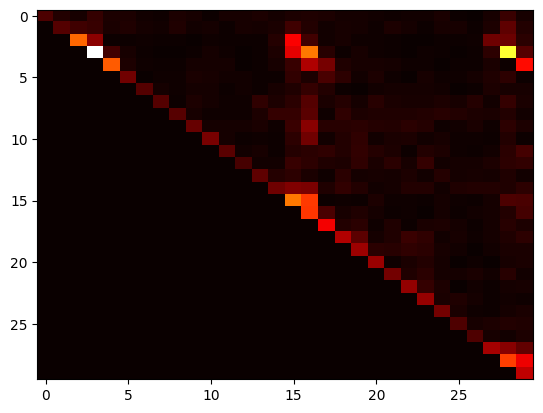

In [17]:
Q, R = np.linalg.qr(norm_win_spectra[28])
plt.imshow(np.abs(R), cmap="hot", aspect="auto")
# plt.plot(np.linalg.norm(R, axis=1)**2, marker="o", label="norm(R)")

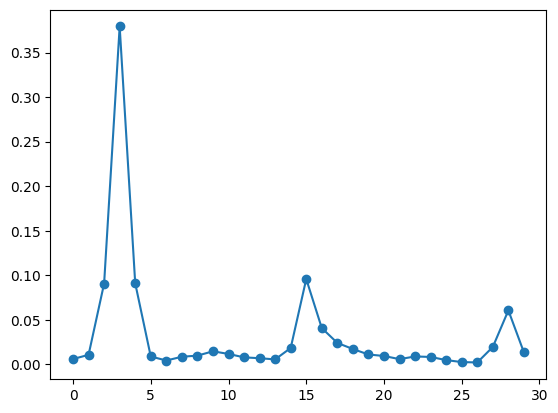

In [18]:
qr_approx2 = np.sum(np.multiply(R, np.conjugate(R)).real, axis=1)
# max(qr_approx2) / np.sum(np.absolute(qr_approx2))
# plt.plot(qr_approx2, marker="o", label="QR approx")
plt.plot(qr_approx2 / np.sum(np.absolute(qr_approx2)), marker="o", label="QR approx")

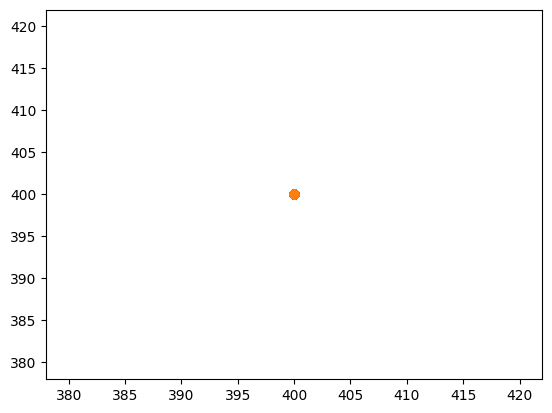

In [ ]:
sum_norms_s = [a+b for a, b in zip(max_norms_events, other_norms_events)]
sum_norms_n = [a+b for a, b in zip(max_norms_noise, other_norms_noise)]

r_sum_norms_s = [a+b for a, b in zip(r_max_norms_events, r_other_norms_events)]
r_sum_norms_n = [a+b for a, b in zip(r_max_norms_noise, r_other_norms_noise)]

plt.plot(sum_norms_s, r_sum_norms_s, "-o")
plt.plot(sum_norms_n, r_sum_norms_n, "-o")

In [19]:
norms = np.linalg.norm(norm_win_spectra[4], axis=0)
max_ind = np.argmax(norms)

divide_by = norms[max_ind] * norms
unit_dot_products = (norm_win_spectra[4].T @ np.conjugate(norm_win_spectra[4][:, max_ind])) / divide_by
# sum(norms ** 2) - norms[max_ind] ** 2
(norms**2 * unit_dot_products)
# abs(unit_dot_products)
unit_dot_products

array([ 0.03300951+0.05865949j, -0.02567616+0.02360955j,
        0.02540673-0.01651126j, -0.14967507-0.02029128j,
        0.04471172-0.01474255j, -0.04944677+0.01715545j,
       -0.08102121-0.01024314j, -0.00434591+0.018546j  ,
        0.09836166+0.00199234j,  0.0394529 +0.00332722j,
        0.04884956-0.04712996j, -0.1231385 +0.04911679j,
        0.065573  +0.02829425j, -0.00384918-0.00658038j,
        0.01748563+0.00337091j, -0.5991709 -0.0116714j ,
        1.        +0.j        , -0.36027061+0.02728229j,
        0.01230686-0.01049909j,  0.00243052+0.01240867j,
        0.02138531-0.02656151j, -0.07191729+0.02920602j,
        0.04884445+0.00607635j,  0.01844728-0.00907752j,
       -0.01822554+0.0131529j , -0.08038142+0.06065327j,
        0.13736016-0.02404155j, -0.06184319-0.04351393j,
        0.05795777-0.05563289j, -0.11500288-0.06146321j])

In [21]:
big_events= [2, 3, 4, 10, -1]
group_index = 2

In [22]:
max_norms_events = []
other_norms_events = []
max_norms_noise = []
other_norms_noise = []
r_max_norms_events = []
r_other_norms_events = []
r_max_norms_noise = []
r_other_norms_noise = []

threshold_u = 0.15
threshold_d = 0.05
end_sample = -1
basepath = Path("D:\CSM\Mines_Research\Test_data\BH_events")
for group_index in big_events:
    if group_index == -1:
        end_sample = 10000
        basepath = Path("D:\CSM\Mines_Research\Test_data\Brady Hotspring")
    coherence_data = get_coherence_data(event_file_groups,
                                        basepath, group_index = group_index,
                                        start_channel=start_ch,
                                        end_channel=nchannels + start_ch,
                                        num_sensors=nsensors,
                                        end_sample=end_sample)

    norm_win_spectra, frequencies = f.normalised_windowed_spectra(
        coherence_data, win_len, overlap, sample_interval=1 / samples_per_sec
    )

    num_frames = norm_win_spectra.shape[0] - 400
    eig_ratios_coherence = np.empty(num_frames-1)

    for i in range(1,num_frames):
        S = np.linalg.svd(
                norm_win_spectra[i],
                compute_uv=False,
                hermitian=False,
            )
        svd_approx2 = S**2
        eig_ratios_coherence[i-1] = np.max(svd_approx2) / np.sum(svd_approx2)

    eig_ratios_coherence = eig_ratios_coherence - np.median(eig_ratios_coherence)

    a, b, c, d = get_norm_parameters(
        eig_ratios_coherence, norm_win_spectra[1:num_frames], threshold_u, threshold_d, qr=False, dot_product=True
    )
    max_norms_events.extend(a)
    other_norms_events.extend(b)
    max_norms_noise.extend(c)
    other_norms_noise.extend(d)

    a, b, c, d = get_norm_parameters(
        eig_ratios_coherence, norm_win_spectra[1:num_frames], threshold_u, threshold_d, qr=True, dot_product=True
    )
    r_max_norms_events.extend(a)
    r_other_norms_events.extend(b)
    r_max_norms_noise.extend(c)
    r_other_norms_noise.extend(d)
    
    print(group_index, len(max_norms_events), len(max_norms_noise))

Loading D:\CSM\Mines_Research\Test_data\BH_events\PoroTomo_iDAS16043_160313220848.h5
Loading D:\CSM\Mines_Research\Test_data\BH_events\PoroTomo_iDAS16043_160313220918.h5
2 125 444
Loading D:\CSM\Mines_Research\Test_data\BH_events\PoroTomo_iDAS16043_160313221218.h5
Loading D:\CSM\Mines_Research\Test_data\BH_events\PoroTomo_iDAS16043_160313221248.h5
3 189 939
Loading D:\CSM\Mines_Research\Test_data\BH_events\PoroTomo_iDAS16043_160314010048.h5
Loading D:\CSM\Mines_Research\Test_data\BH_events\PoroTomo_iDAS16043_160314010118.h5
4 278 1408
Loading D:\CSM\Mines_Research\Test_data\BH_events\PoroTomo_iDAS16043_160314083548.h5
Loading D:\CSM\Mines_Research\Test_data\BH_events\PoroTomo_iDAS16043_160314083618.h5
10 345 1908
Loading D:\CSM\Mines_Research\Test_data\Brady Hotspring\PoroTomo_iDAS16043_160314083818.h5
Loading D:\CSM\Mines_Research\Test_data\Brady Hotspring\PoroTomo_iDAS16043_160314083848.h5
Loading D:\CSM\Mines_Research\Test_data\Brady Hotspring\PoroTomo_iDAS16043_160314083918.h5
-1 4

In [25]:
r_max_norms_events

[(25.44243072504367-18.86027115898909j),
 (30.108739368967157+37.609140320079085j),
 (95.33374977844994-8.577840576155133j),
 (16.95006546113319-32.21049518757064j),
 (31.123245264468885+3.9550270459774675j),
 (42.885379469619934+17.841910686023585j),
 (61.8875008571729-45.76410707190614j),
 (-3.9395783255518637+35.63103337018947j),
 (89.10988558905079+10.558957667478007j),
 (29.299274186266786-36.06387591891881j),
 (51.93046896379629+24.01866981300538j),
 (59.258641783593404-13.077654602163513j),
 (79.3801921009345+39.01862653117018j),
 (93.61721762007517-56.63017733695185j),
 (-4.079842128070659+19.05500581814108j),
 (134.49988807175947+33.569750272275485j),
 (53.6329259394398-53.80567545932025j),
 (53.22415336110075+17.172539244143582j),
 (36.314733445944285-4.205295716819947j),
 (61.25150057588523+28.279674664959103j),
 (53.86792828686414-47.3257748737379j),
 (-0.6061020840960865+14.376590194081675j),
 (11.45761992309792-70.1480624135188j),
 (20.041218403758506-21.498774193356972j)

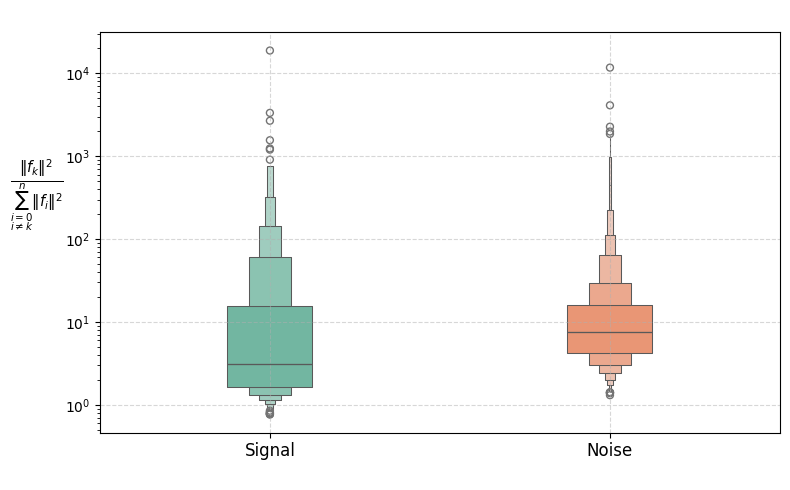

d:\CSM\Mines_Research\Repositories\Coherence_Analyses\.venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\CSM\Mines_Research\Repositories\Coherence_Analyses\.venv\Lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


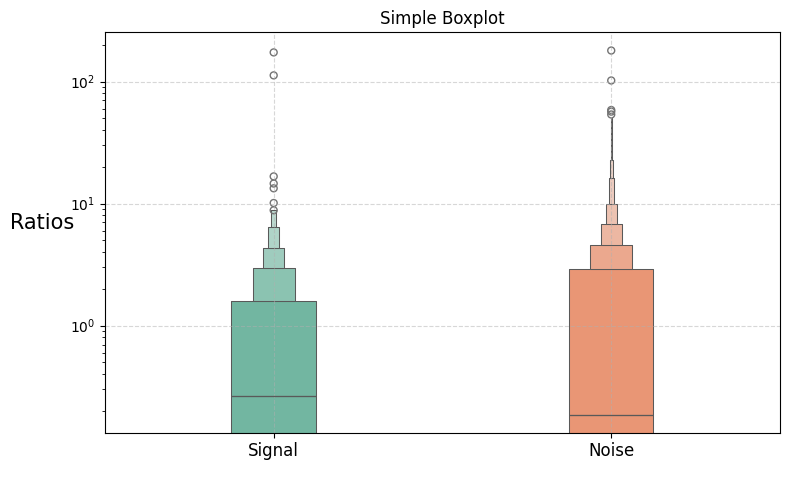

In [23]:
ratios_events = [abs(a/(b.real)) for a, b in zip(max_norms_events, other_norms_events)]
ratios_noise = [abs(a/(b.real)) for a, b in zip(max_norms_noise, other_norms_noise)]
r_ratios_events = [a/b for a, b in zip(r_max_norms_events, r_other_norms_events)]
r_ratios_noise = [a/b for a, b in zip(r_max_norms_noise, r_other_norms_noise)]
plot_boxplot([ratios_events, ratios_noise], title=" ", xlabel=" ", ylabel=r"$\frac{\|f_k\|^2}{\sum_{\substack{i=0 \\ i\neq k}}^{n} \|f_i\|^2}$", xtick_labels=["Signal", "Noise"], box_width=0.25)
plot_boxplot([r_ratios_events, r_ratios_noise], title="Simple Boxplot", xlabel=" ", ylabel="Ratios", xtick_labels=["Signal", "Noise"], box_width=0.25)

d:\CSM\Mines_Research\Repositories\Coherence_Analyses\.venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\CSM\Mines_Research\Repositories\Coherence_Analyses\.venv\Lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


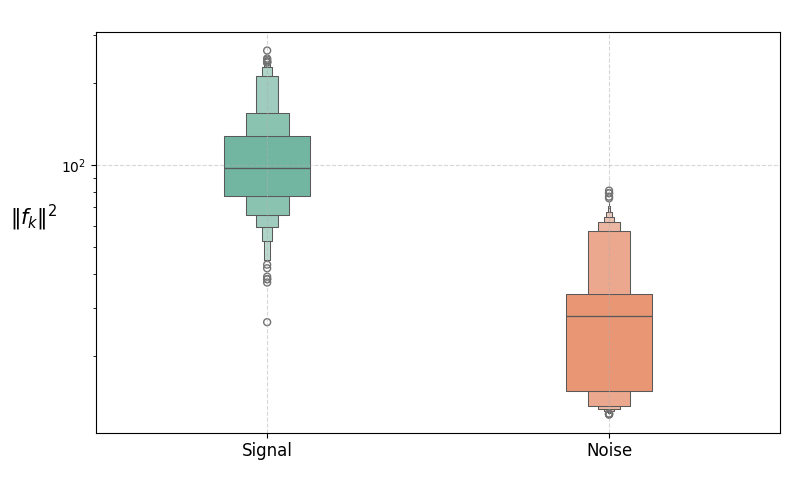

d:\CSM\Mines_Research\Repositories\Coherence_Analyses\.venv\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
d:\CSM\Mines_Research\Repositories\Coherence_Analyses\.venv\Lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


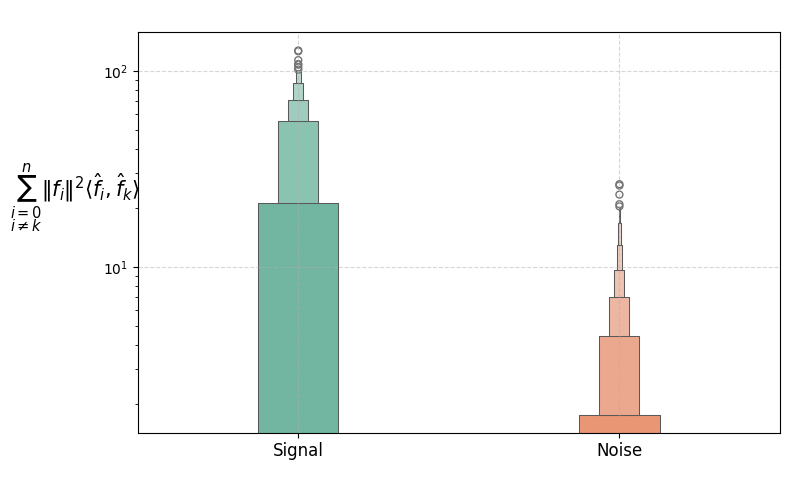

In [24]:
plot_boxplot([max_norms_events, max_norms_noise], title=" ", xlabel=" ", ylabel=r"$\|f_k\|^2$", xtick_labels=["Signal", "Noise"], box_width=0.25)
# plot_boxplot([r_max_norms_events, r_max_norms_noise], title="Simple Boxplot", xlabel=" ", ylabel="Ratios", xtick_labels=["Signal", "Noise"], box_width=0.25)

plot_boxplot([other_norms_events, other_norms_noise], title=" ", xlabel=" ", ylabel=r"$\sum_{\substack{i=0 \\ i\neq k}}^{n} \|f_i\|^2 \langle \hat{f}_i, \hat{f}_k \rangle$", xtick_labels=["Signal", "Noise"], box_width=0.25)
# plot_boxplot([r_other_norms_events, r_other_norms_noise], title="Simple Boxplot", xlabel=" ", ylabel="Ratios", xtick_labels=["Signal", "Noise"], box_width=0.25)

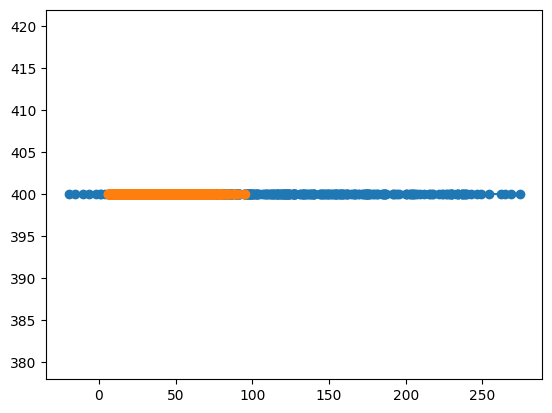

In [ ]:
sum_norms_s = [a+b.real for a, b in zip(max_norms_events, other_norms_events)]
sum_norms_n = [a+b.real for a, b in zip(max_norms_noise, other_norms_noise)]

r_sum_norms_s = [a+b for a, b in zip(r_max_norms_events, r_other_norms_events)]
r_sum_norms_n = [a+b for a, b in zip(r_max_norms_noise, r_other_norms_noise)]

plt.plot(sum_norms_s, r_sum_norms_s, "-o")
plt.plot(sum_norms_n, r_sum_norms_n, "-o")

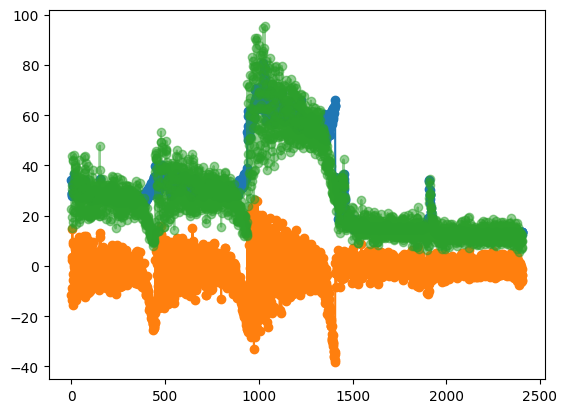

In [ ]:
# plt.plot(max_norms_events, marker="o", label="Signal")
# plt.plot(other_norms_events, marker="o", label="Signal")
# plt.plot(sum_norms_s, marker="o", label="Signal")

plt.plot(max_norms_noise, marker="o", label="Noise")
plt.plot(other_norms_noise, marker="o", label="Noise")
plt.plot(sum_norms_n, marker="o", alpha=0.5, label="Signal")

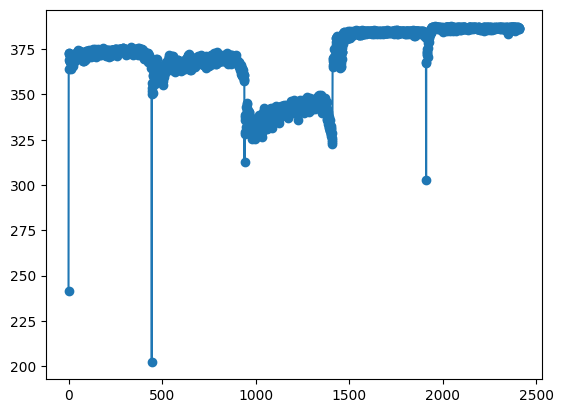

In [ ]:
plt.plot(r_other_norms_noise, marker="o", label="Signal")

In [ ]:
other_norms_noise

[(126.60203570533963+0j),
 (-11.690046466263762-14.876683443608735j),
 (3.64578160789506-13.411832119549626j),
 (2.4522244690790593+13.621905689212955j),
 (-8.603048094471117+5.476964993886065j),
 (-13.672575422059666+7.2017253914329125j),
 (14.82256775386685-5.688563767422862j),
 (-15.577467478140814+3.332798535732836j),
 (9.490050483408567+2.323871450569022j),
 (-5.621308694845535+0.04168574458723384j),
 (-3.2059244467135812-5.491194138653656j),
 (8.721644805832796+9.877877276321813j),
 (-9.865870139965594-9.90999691600222j),
 (0.3771279240003409+3.608351607650622j),
 (-13.542153505742036-6.302104249998434j),
 (9.163445359180933+3.0847420760018736j),
 (1.220743712438832-13.827906351698617j),
 (-0.5254580281411592+18.821228649152737j),
 (-9.400525773773971+2.988182760274756j),
 (-10.484558591856832+4.8900448017699825j),
 (7.651509530521093-6.613388645390916j),
 (-5.246708150756312-5.012531886332163j),
 (6.63536449820112+2.8315894278772924j),
 (-5.751016479797787-4.496922085285971j),
 

In [ ]:
# other_norms_events
sum_norms_s

[(147.95536669282197+0j),
 (159.78872680891007+0j),
 (153.66728791696124+0j),
 (127.00904715336767+0j),
 (104.59091552563856+0j),
 (180.964111887252+0j),
 (180.57924847865388+0j),
 (76.50674578064066+0j),
 (181.10229050143343+0j),
 (124.70196282877288+0j),
 (89.64518369469985+0j),
 (150.17126757409056+0j),
 (74.91302059425065+0j),
 (145.00343522164673+0j),
 (93.84169166922179+0j),
 (143.75023110370984+0j),
 (184.2933736345537+0j),
 (171.38542392178863+0j),
 (204.742906368437+0j),
 (145.2902327066672+0j),
 (160.43403387063125+0j),
 (204.59870016244105+0j),
 (109.11162886740945+0j),
 (177.86350255257722+0j),
 (150.74784337319574+0j),
 (97.74900281224335+0j),
 (214.1166427427085+0j),
 (168.90495993421035+0j),
 (158.81956964208632+0j),
 (183.9261151108508+0j),
 (197.52105862502765+0j),
 (185.96987453738475+0j),
 (168.9455682943456+0j),
 (167.65221728050722+0j),
 (185.317736835049+0j),
 (174.19637653998225+0j),
 (183.43425752954522+0j),
 (191.14542036673438+0j),
 (189.66474287731776+0j),
 (

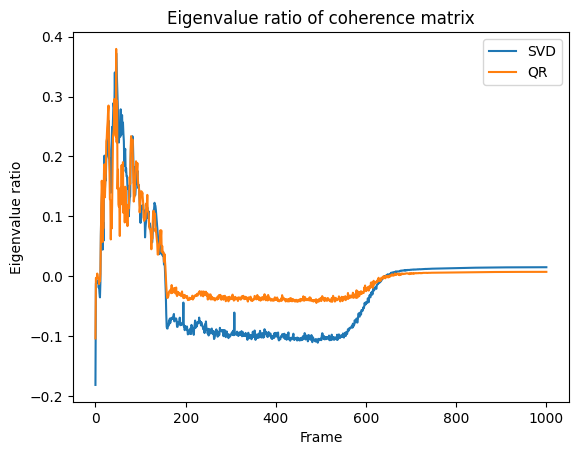

In [ ]:
# vals,counts = np.unique(eig_ratios_coherence, return_counts=True)
# mode = vals[np.argmax(counts)]
# detrend = mode
# vals_qr,counts_qr = np.unique(eig_ratios_coherence_qr, return_counts=True)
# mode_qr = vals_qr[np.argmax(counts_qr)]
# detrend_qr = mode
detrend = np.median(eig_ratios_coherence)
detrend_qr = np.median(eig_ratios_coherence_qr)

plt.plot(
    # eig_ratios_coherence,
    eig_ratios_coherence - detrend,
    label="SVD",
)
plt.plot(
    # eig_ratios_coherence_qr,
    eig_ratios_coherence_qr - detrend_qr,
    label="QR",
)
plt.xlabel("Frame")
plt.ylabel("Eigenvalue ratio")
plt.title("Eigenvalue ratio of coherence matrix")
plt.legend()

In [ ]:
def dot_product(a, b):
    """
    Computes the dot product of the unit vector of two vectors.

    Parameters:
    ----------
    a : array-like
        First vector.
    b : array-like
        Second vector.

    Returns:
    -------
    float
        Dot product of the two vectors.
    """
    # a = np.array(a)
    # b = np.array(b)
    return np.dot(a / np.linalg.norm(a), b / np.linalg.norm(b))